In [34]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import graphviz
from graphviz import Graph

import env
import wrangle_zillow
import Ainslie_wrangle_zillow
import os

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [11]:
# change display settings to show all columns
pd.set_option("display.max_columns", None)

In [2]:
# use a function to pull in zillow data
df = wrangle_zillow.wrangle_zillow()
df.shape

(51945, 24)

In [12]:
# use a function to split data for exploring and modeling
train, validate, test = wrangle_zillow.split_data(df)
train.head(3)

,bathrooms,bedrooms,area,counties,latitude,longitude,lot_area,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvalue,taxvalue,assessmentyear,landtaxvalue,taxamount,logerror,transactiondate,los_angeles,orange,ventura,age,bath_bed_ratio
61675,1.00,2,967,los_angeles,34011122,-118145764,4131,17882.00,3101,96003,0.00,1941.00,42521,83284,2016,40763,1657,0.01,2017-07-28,1,0,0,76,0.50
7581,2.00,3,1743,los_angeles,33786906,-118359765,12303,33727.00,3101,96121,0.00,1959.00,137950,556505,2016,418555,6751,0.42,2017-02-02,1,0,0,58,0.67
48630,1.00,3,1120,los_angeles,34037854,-117944914,6983,39306.00,3101,96488,0.00,1953.00,100000,373000,2016,273000,4455,0.04,2017-06-21,1,0,0,64,0.33


In [10]:
# use a function to scale data for modeling
scaler, train_scaled, validate_scaled, test_scaled = wrangle_zillow.min_max_scaler(train, validate, test)
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((29089, 24), (12467, 24), (10389, 24))

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29089 entries, 61675 to 31495
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          29089 non-null  float64
 1   bedrooms           29089 non-null  int64  
 2   area               29089 non-null  int64  
 3   counties           29089 non-null  object 
 4   latitude           29089 non-null  int64  
 5   longitude          29089 non-null  int64  
 6   lot_area           29089 non-null  int64  
 7   regionidcity       29089 non-null  float64
 8   regionidcounty     29089 non-null  object 
 9   regionidzip        29089 non-null  object 
 10  roomcnt            29089 non-null  float64
 11  yearbuilt          29089 non-null  float64
 12  structuretaxvalue  29089 non-null  int64  
 13  taxvalue           29089 non-null  int64  
 14  assessmentyear     29089 non-null  object 
 15  landtaxvalue       29089 non-null  int64  
 16  taxamount         

In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,29089.00,2.28,0.98,1.00,2.00,2.00,3.00,10.00
bedrooms,29089.00,3.30,0.93,1.00,3.00,3.00,4.00,12.00
area,29089.00,1899.37,938.98,300.00,1263.00,1650.00,2290.00,11020.00
latitude,29089.00,34024104.39,274310.86,33340620.00,33827385.00,34025724.00,34189058.00,34818767.00
longitude,29089.00,-118193863.72,356191.60,-119475265.00,-118399974.00,-118153327.00,-117930191.00,-117554636.00
lot_area,29089.00,11306.04,88440.99,236.00,5595.00,6795.00,8720.00,6971010.00
regionidcity,29089.00,33312.43,49554.57,3491.00,12447.00,24435.00,40227.00,396556.00
roomcnt,29089.00,1.90,3.14,0.00,0.00,0.00,5.00,14.00
yearbuilt,29089.00,1963.21,23.02,1880.00,1950.00,1960.00,1979.00,2016.00
structuretaxvalue,29089.00,186578.14,196723.79,148.00,76088.00,130000.00,223152.00,3316500.00


<AxesSubplot:>

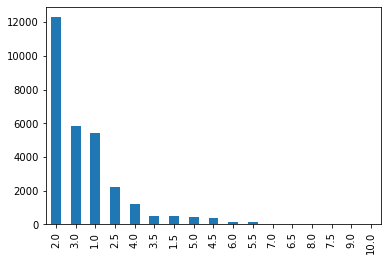

In [29]:
# check bathroom value counts
train.bathrooms.value_counts().plot.bar()

<AxesSubplot:>

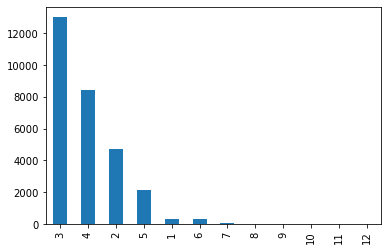

In [30]:
# check bedroom value counts
train.bedrooms.value_counts().plot.bar()

<AxesSubplot:>

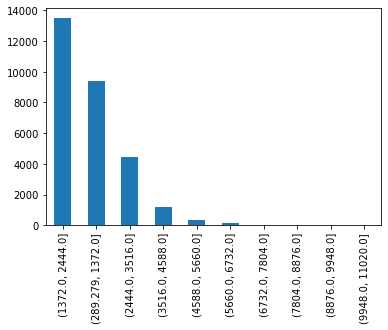

In [31]:
# check binned area value counts
train.area.value_counts(bins=10).plot.bar()

<AxesSubplot:>

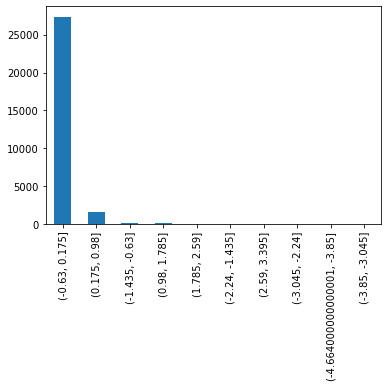

In [32]:
# check binned logerror value counts
train.logerror.value_counts(bins=10).plot.bar()

<AxesSubplot:>

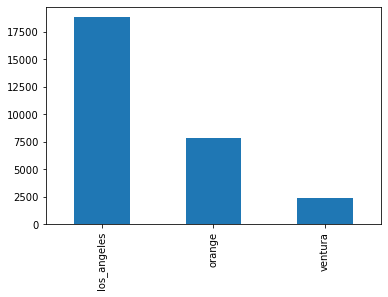

In [33]:
# check binned logerror value counts
train.counties.value_counts().plot.bar()

In [35]:
train.columns

Index(['bathrooms', 'bedrooms', 'area', 'counties', 'latitude', 'longitude',
       'lot_area', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt',
       'yearbuilt', 'structuretaxvalue', 'taxvalue', 'assessmentyear',
       'landtaxvalue', 'taxamount', 'logerror', 'transactiondate',
       'los_angeles', 'orange', 'ventura', 'age', 'bath_bed_ratio'],
      dtype='object')

<AxesSubplot:>

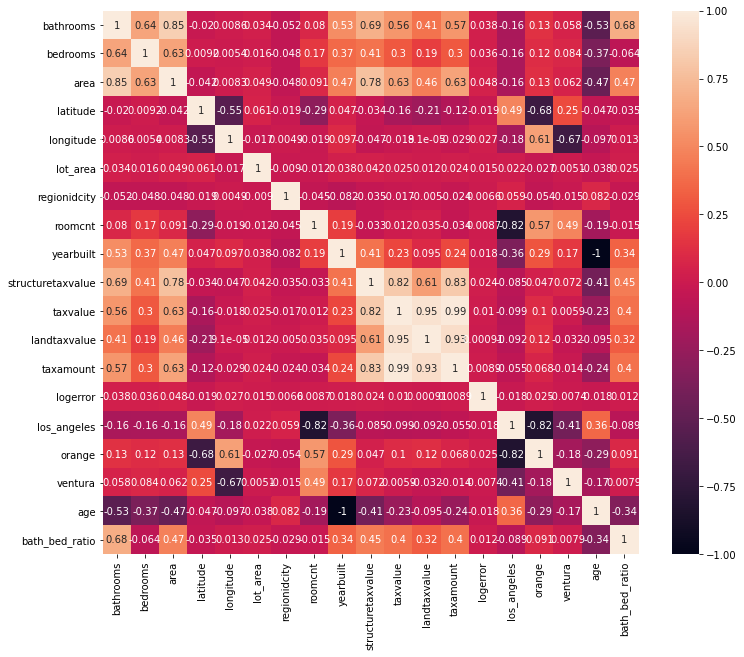

In [22]:
# use a heatmap to see if there are any obvious correlations
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29089 entries, 61675 to 31495
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          29089 non-null  float64
 1   bedrooms           29089 non-null  int64  
 2   area               29089 non-null  int64  
 3   counties           29089 non-null  object 
 4   latitude           29089 non-null  int64  
 5   longitude          29089 non-null  int64  
 6   lot_area           29089 non-null  int64  
 7   regionidcity       29089 non-null  float64
 8   regionidcounty     29089 non-null  object 
 9   regionidzip        29089 non-null  object 
 10  roomcnt            29089 non-null  float64
 11  yearbuilt          29089 non-null  float64
 12  structuretaxvalue  29089 non-null  int64  
 13  taxvalue           29089 non-null  int64  
 14  assessmentyear     29089 non-null  object 
 15  landtaxvalue       29089 non-null  int64  
 16  taxamount         